# Electrical Grid Dataset

In [1]:
# importing the needed data


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV,
                                     GridSearchCV
                                    )
from sklearn.ensemble import (RandomForestClassifier,
                             GradientBoostingClassifier, 
                              ExtraTreesClassifier
                             )
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             mean_absolute_error,
                             mean_squared_error,
                             classification_report,
                             r2_score
                            )
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder                        
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
# Loading the dataset into dataFrame
data = pd.read_csv('Data_for_UCI_named.csv')
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [3]:
data.shape

(10000, 14)

In [4]:
#Dataset description
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [5]:
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

C:\Users\Olayinka Akerekan\AppData\Local\Temp\ipykernel_14276\1818839599.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

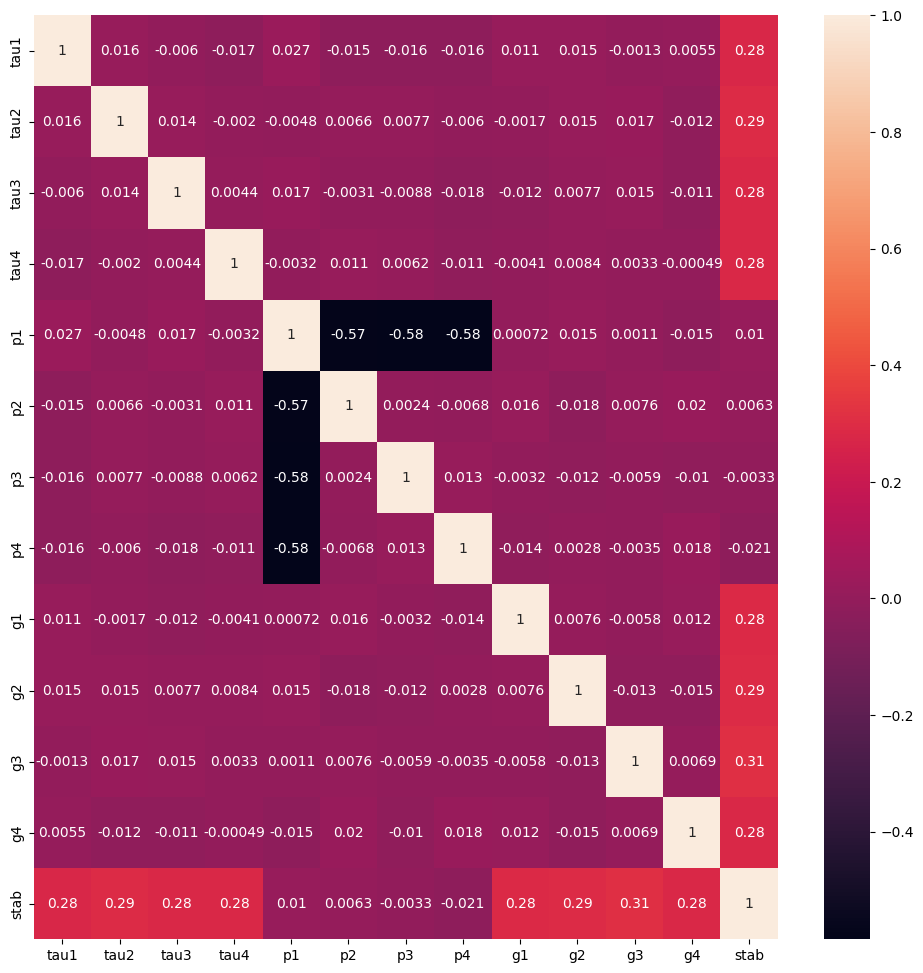

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

In [7]:
#check for any missing data

data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

There are no missing values in the dataset

In [8]:
#Dropping the stab column as it correlate greatly with the stabf column

data = data.drop('stab', axis=1)


In [9]:
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

The column 'stab' have been dropped succesfully

### Label Encoding

In [10]:

enc = LabelEncoder()
data['stabf'] = enc.fit_transform(data['stabf'])

In [11]:
X = data.drop('stabf',axis = 1)
y = data['stabf']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.20, random_state=1)

In [13]:
X_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,9.504984,5.265415,2.029617,8.026334,3.449756,-0.922754,-1.526305,-1.000696,0.191864,0.611297,0.080008,0.350312
7813,8.035818,4.632548,1.177810,1.204950,4.093208,-1.568218,-0.819966,-1.705024,0.223384,0.317770,0.726623,0.441620
905,7.052560,3.264057,1.405949,4.497549,3.741358,-0.629026,-1.407945,-1.704387,0.868306,0.605566,0.100591,0.747320
5192,5.085242,1.790031,2.486392,2.848192,3.159670,-0.892898,-1.025461,-1.241311,0.473917,0.418512,0.326253,0.982488


In [14]:
X_test

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314
...,...,...,...,...,...,...,...,...,...,...,...,...
3919,8.320531,3.394352,1.468729,8.766874,3.940123,-1.599081,-0.931023,-1.410020,0.657445,0.493384,0.178907,0.173240
162,2.290102,3.028512,8.071234,6.169944,3.624592,-1.104003,-0.820951,-1.699638,0.785595,0.770194,0.234290,0.225070
7903,7.848945,0.684889,0.728223,6.702948,2.599685,-0.563497,-1.210069,-0.826119,0.185122,0.559799,0.682418,0.886902
2242,2.173967,5.776797,4.597638,6.399330,2.869349,-0.931891,-1.237955,-0.699503,0.942680,0.743103,0.152161,0.305183


In [15]:
y_train

2694    1
5140    1
2568    1
3671    1
7427    1
       ..
2895    0
7813    0
905     1
5192    1
235     0
Name: stabf, Length: 8000, dtype: int32

In [16]:
y_test

9953    1
3850    1
4962    0
3886    0
5437    1
       ..
3919    0
162     0
7903    0
2242    1
2745    1
Name: stabf, Length: 2000, dtype: int32

## Standard Scaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train,y_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))


### RandomForest Classification

In [19]:
Random_clf = RandomForestClassifier()

In [20]:
Random_clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [21]:
Predictions = Random_clf.predict(X_test_scaled)

In [22]:
confusion_matrix(y_test, Predictions)

array([[ 628,   84],
       [  58, 1230]], dtype=int64)

In [23]:
accuracy_score(y_test, Predictions)

0.929

In [24]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.94      0.95      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



### ExtraTrees Classification

In [25]:
ExtraTrees_clf = ExtraTreesClassifier()

In [26]:
ExtraTrees_clf.fit(X_train_scaled, y_train)


ExtraTreesClassifier()

In [27]:
Predictions = ExtraTrees_clf.predict(X_test_scaled)

In [28]:
accuracy_score(y_test, Predictions)

0.924

In [29]:
confusion_matrix(y_test, Predictions)

array([[ 596,  116],
       [  36, 1252]], dtype=int64)

In [30]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       712
           1       0.92      0.97      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.93      0.92      0.92      2000



### HyperParameter Tuning with Randomised Search CV

In [31]:
n_estimator = [100, 300, 500, 1000]
min_samples_split = [2, 5, 7]
min_samples_leaf = [4, 6, 8]
max_features = [None, 'auto', 'log2']



distributions = {'n_estimators': n_estimator,
       'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf,
       'max_features': max_features
       }
RSearchCV = RandomizedSearchCV(estimator=ExtraTrees_clf, param_distributions=distributions,cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)

In [32]:
RSearchCV.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Olayinka Akerekan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': [None, 'auto', 'log2'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [33]:
Best_RS = RSearchCV.best_estimator_

Best_RS

ExtraTreesClassifier(max_features='auto', min_samples_leaf=6,
                     min_samples_split=5, n_estimators=1000)

In [34]:
print(f'This is the best parameter: {Best_RS}')

This is the best parameter: ExtraTreesClassifier(max_features='auto', min_samples_leaf=6,
                     min_samples_split=5, n_estimators=1000)


In [35]:
Predictions = Best_RS.predict(X_test_scaled)

In [36]:
accuracy_score(y_test, Predictions)

0.917

#### The accuracy got lower after hyperparameter tuning with RandomisedSearchCV

In [37]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       712
           1       0.89      0.99      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.94      0.89      0.90      2000
weighted avg       0.92      0.92      0.91      2000



### HyperParameter Tuning with GridSearchCV

In [38]:
n_estimator = [100, 300, 500, 1000]
min_samples_split = [2, 5, 7]
min_samples_leaf = [4, 6, 8]
max_features = [None, 'auto', 'log2']



distributions = {'n_estimators': n_estimator,
       'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf,
       'max_features': max_features
       }
GSearchCV = GridSearchCV(estimator=ExtraTrees_clf, param_grid=distributions,cv=5, scoring = 'accuracy', n_jobs = -1, verbose =1)

In [39]:
GSearchCV.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_features': [None, 'auto', 'log2'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 300, 500, 1000]},
             scoring='accuracy', verbose=1)

In [40]:
Best_GS = GSearchCV.best_estimator_

Best_GS

ExtraTreesClassifier(max_features=None, min_samples_leaf=4, min_samples_split=7,
                     n_estimators=300)

In [41]:
print(f'This is the best parameter: {Best_GS}')

This is the best parameter: ExtraTreesClassifier(max_features=None, min_samples_leaf=4, min_samples_split=7,
                     n_estimators=300)


In [42]:
Predictions = Best_RS.predict(X_test_scaled)

In [43]:
accuracy_score(y_test, Predictions)

0.917

In [44]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       712
           1       0.89      0.99      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.94      0.89      0.90      2000
weighted avg       0.92      0.92      0.91      2000



In [53]:
def get_weights_df(model, feat, col_name):
  weights =  pd.Series(model.feature_importances_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
#   col_name = {0:'tau1', 1:'tau2', 2:'tau3', 3:'tau4', 4:'p1', 5:'p2', 5:'p3', 6:'p4', 7:'g1', 8:'g2',
#        9:'g3', 10:'g4'}
  weights_df.columns = ['Features',col_name]
  weights_df[col_name].round(3)
  return weights_df

In [54]:
Best_RS_weights = get_weights_df(Best_RS, X_train_scaled, 'Best_RS_Weight')
Best_RS_weights

,Features,Best_RS_Weight
0,4,0.009591
1,7,0.012662
2,6,0.012814
3,5,0.012866
4,8,0.092300
5,11,0.100109
6,9,0.100927
7,10,0.105768
8,2,0.134373
9,3,0.135931


#### 'tau2' is the most important features and  'p1' is the Least important features

### XGBOOST CLASSIFIER

In [55]:
xgboost_clf = XGBClassifier()

In [56]:
xgboost_clf.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [57]:
Predictions = xgboost_clf.predict(X_test_scaled)

In [58]:
accuracy_score(y_test, Predictions)

0.9455

In [59]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       712
           1       0.95      0.97      0.96      1288

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



### Gradient Boost Classifier

In [60]:
gradientboost_clf = GradientBoostingClassifier()

In [61]:
gradientboost_clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [62]:
Predictions = gradientboost_clf.predict(X_test_scaled)

In [63]:
accuracy_score(y_test, Predictions)

0.919

In [64]:
print(classification_report(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       712
           1       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000

